In [1]:
import pandas as pd

In [2]:
url='https://raw.githubusercontent.com/jdodway/F1Analysis/main/F1QueryResults/f1driversnation.csv'
DriversNations = pd.read_csv(url,index_col=0)

In [3]:
DriversNations.rename({'count(code)':'Number of F1 Drivers','nationality':'Nationality'},axis='columns',inplace=True)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
DriversNations

,Number of F1 Drivers
nationality,
British,165
American,157
Italian,99
French,73
German,50
Brazilian,32
Argentine,24
South African,23
Swiss,23


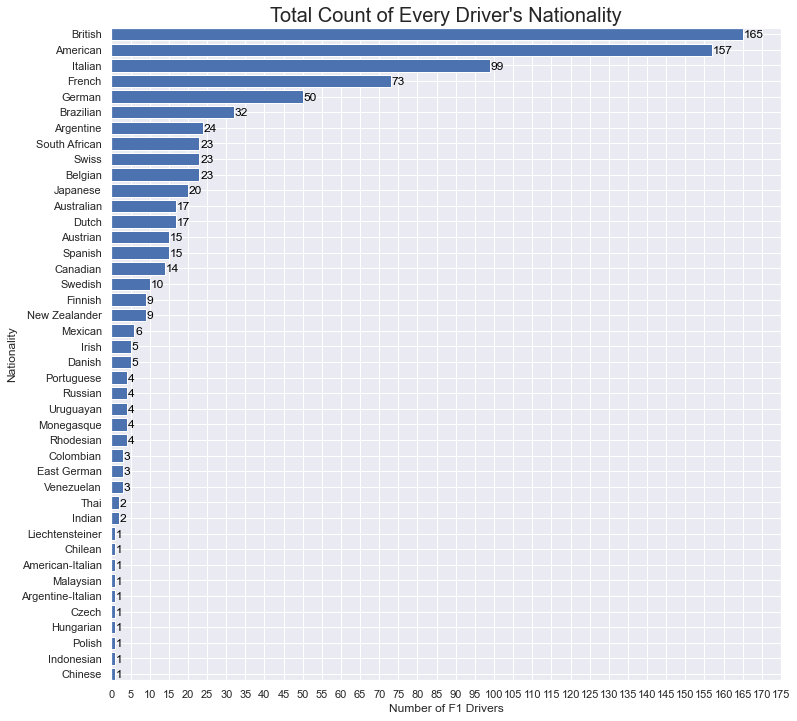

In [6]:
plt.figure(figsize=(12,12))
sns.set(rc={'figure.figsize':(12,12)})

y = DriversNations.index
x = DriversNations['Number of F1 Drivers']
plt.barh(y, width=x)
plt.gca().invert_yaxis()
plt.margins(y=0)
plt.title("Total Count of Every Driver's Nationality", fontsize=20)
plt.xticks(np.arange(0,180,step=5))
plt.ylabel('Nationality')
plt.xlabel('Number of F1 Drivers')
for i, v in enumerate(DriversNations['Number of F1 Drivers']):
    plt.text(v+0.2, i+.25, str(round(v, 2)), color='black')

plt.savefig('F1DriverNationsBar.jpeg')

plt.show()

In [7]:
percents=[]
for c in DriversNations['Number of F1 Drivers']:
    percent = c / (sum(DriversNations['Number of F1 Drivers']))*100
    percents.append("{:.1f}".format(percent)) 
print(percents)

['19.3', '18.4', '11.6', '8.5', '5.9', '3.7', '2.8', '2.7', '2.7', '2.7', '2.3', '2.0', '2.0', '1.8', '1.8', '1.6', '1.2', '1.1', '1.1', '0.7', '0.6', '0.6', '0.5', '0.5', '0.5', '0.5', '0.5', '0.4', '0.4', '0.4', '0.2', '0.2', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


In [8]:
legend = DriversNations.index +' '+'-'+ ' ' + percents + '%'

print(legend)

Index(['British - 19.3%', 'American - 18.4%', 'Italian - 11.6%',
       'French - 8.5%', 'German - 5.9%', 'Brazilian - 3.7%',
       'Argentine - 2.8%', 'South African - 2.7%', 'Swiss - 2.7%',
       'Belgian - 2.7%', 'Japanese - 2.3%', 'Australian - 2.0%',
       'Dutch - 2.0%', 'Austrian - 1.8%', 'Spanish - 1.8%', 'Canadian - 1.6%',
       'Swedish - 1.2%', 'Finnish - 1.1%', 'New Zealander - 1.1%',
       'Mexican - 0.7%', 'Irish - 0.6%', 'Danish - 0.6%', 'Portuguese - 0.5%',
       'Russian - 0.5%', 'Uruguayan - 0.5%', 'Monegasque - 0.5%',
       'Rhodesian - 0.5%', 'Colombian - 0.4%', 'East German - 0.4%',
       'Venezuelan - 0.4%', 'Thai - 0.2%', 'Indian - 0.2%',
       'Liechtensteiner - 0.1%', 'Chilean - 0.1%', 'American-Italian - 0.1%',
       'Malaysian - 0.1%', 'Argentine-Italian - 0.1%', 'Czech - 0.1%',
       'Hungarian - 0.1%', 'Polish - 0.1%', 'Indonesian - 0.1%',
       'Chinese - 0.1%'],
      dtype='object', name='nationality')


In [9]:
from random import randint

color = []
n = len(DriversNations)

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

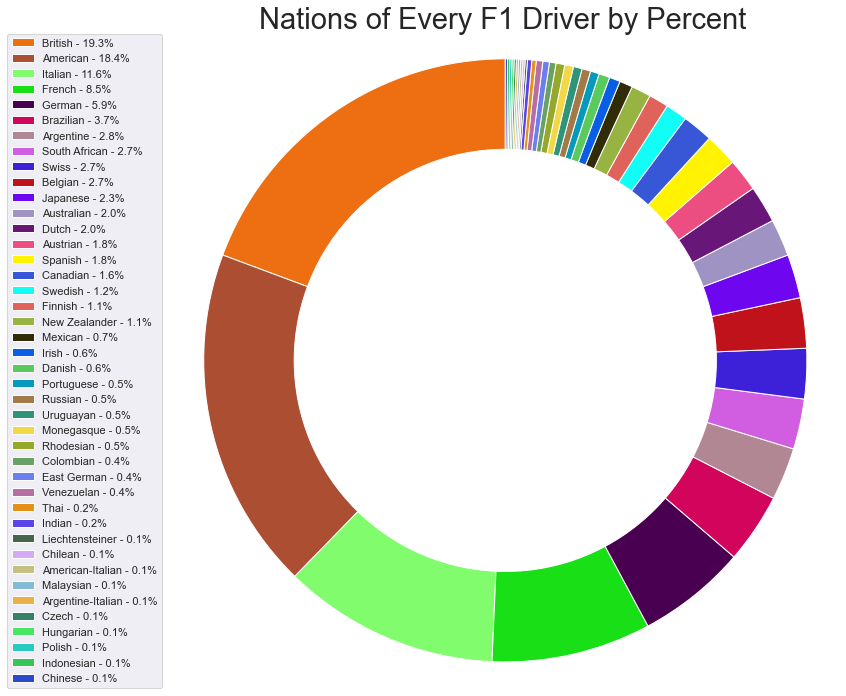

In [10]:
labels = list(len(DriversNations)*' ')

plt.pie(DriversNations['Number of F1 Drivers'],labels=labels, colors = color, startangle= 90 )

title = plt.title('Nations of Every F1 Driver by Percent',fontdict = {'fontsize' : 29})
title.set_ha("center")
plt.gca().axis("equal")

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.legend(legend, bbox_to_anchor=(0, 0.5), loc = 'right')

plt.savefig('F1DriverNationsPie.jpeg')
plt.show()

In [17]:
url = 'https://raw.githubusercontent.com/jdodway/F1Analysis/main/F1QueryResults/F1AmericanTimeline.csv'
AmericanTimeline = pd.read_csv(url)
AmericanTimeline.groupby('year').head()


,driverId,year,surname,forename,nationality
0,653,1950,NaN,NaN,American
1,795,1950,NaN,NaN,American
2,537,1950,Rathmann,Dick,American
3,726,1950,NaN,NaN,American
4,654,1950,NaN,NaN,American
...,...,...,...,...,...
529,158,1989,Cheever,Eddie,American
530,121,1993,Andretti,Michael,American
531,26,2006,Speed,Scott,American
532,26,2007,Speed,Scott,American


In [ ]:
pivAmerica = AmericanTimeline.pivot(index='Year', columns = 'year', values = 'FastestLap')